<a href="https://colab.research.google.com/github/vineelad/Analysing-traffic-in-the-state-of-Connecticut/blob/master/Analyzing_traffic_patterns_in_the_State_of_Connecticut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing traffic patterns in the State of Connecticut





## Datasets:
Below are the links of data sources we used in the analysis:
1.	[2015 American Community Survey (ACS) economic data](https://portal.ct.gov/DECD/Content/About_DECD/Research-and-Publications/01_Access-Research/Exports-and-Housing-and-Income-Data)
2.	Highway descriptions and data:
a.	[I-95](https://en.wikipedia.org/wiki/Interstate_95_in_Connecticut) 
b.	[I-91](https://en.wikipedia.org/wiki/Interstate_91)
c.	[Merritt Parkway](https://en.wikipedia.org/wiki/Merritt_Parkway)
3.	[Average daily traffic (ADT) by route and town index](https://catalog.data.gov/dataset/2012-final-adt-counts-for-the-state-road-network)
4.	[Population data](https://portal.ct.gov/DPH/Health-Information-Systems--Reporting/Population/Annual-Town-and-County-Population-for-Connecticut) 
5.	[Geographic data](https://ctstatelibrary.org/cttowns/counties) 


# Loading Data from the datasets

## Loading Libraries

In [0]:
# Importing Pandas and Numpy
import pandas as pd
import numpy as np
from pandas import read_excel
import matplotlib.pyplot as plt

## Loading American Community Survey (ACS) economic data

In [0]:
# Loading Data from file: 1_ctincome2015_ct_income_ForWrangling
# https://drive.google.com/file/d/1MhT8aHX5wF4Ia5zLg2xlE2hWLrc03C1O
# dropna documentation link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

url = "https://drive.google.com/uc?export=download&id=1MhT8aHX5wF4Ia5zLg2xlE2hWLrc03C1O"
dataframe = pd.read_csv(url,header=0,skiprows=5,usecols=[0,1,2,3],error_bad_lines=False)
df_acsecon=pd.DataFrame(dataframe)
df_acsecon=df_acsecon.dropna(axis=0, how='all')  #Removing rows of data which have no data in all the columns using dropna
df_acsecon.head()
# Final Dataset has 169 rows with columns [Towns, Median household income, Mean household income, Per capita income]

,Towns,Median household income,Mean household income,Per capita income
1,Andover,"100,321","111,230","40,182"
2,Andover,"100,321","111,230","40,182"
3,Ashford,"77,870","95,339","39,139"
4,Avon,"123,894","172,245","66,822"
5,Barkhamsted,"95,735","102,210","40,156"


##Loading Highway Data

### I-91 Data

In [0]:
pd.options.display.max_rows = 999

# Loading Data from file:2_Interstate91
# https://drive.google.com/open?id=1ApILGUI0bd5-uRHid__hBpqYUcweUx70
# Fillna documentation link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

#I-91
url= "https://drive.google.com/uc?export=download&id=1ApILGUI0bd5-uRHid__hBpqYUcweUx70"
dataframe=pd.read_csv(url, header=0, encoding='cp1252')
df_i91=pd.DataFrame(dataframe)
df_i91=df_i91.fillna(method='ffill')  #Using fillna to propogate the values forward
df_i91.head()


,State,County,Location[3][41],mi[3][4][42],km,Exit[43],Destinations,Notes
0,Connecticut,New Haven,New Haven,0.00,0.00,NaN,I-95 south New York City,Exit 48 on I-95 north
1,Connecticut,New Haven,New Haven,0.09,0.14,1,MLK Boulevard (Route 34) Downtown New Haven,Southbound exit and northbound entrance; easte...
2,Connecticut,New Haven,New Haven,0.09,0.14,1,I-95 north New London,Includes direct entrance ramp from Wooster Str...
3,Connecticut,New Haven,New Haven,0.63,1.01,2,Hamilton Street,Northbound exit only from I-95S entrance ramp
4,Connecticut,New Haven,New Haven,0.63,1.01,2,Hamilton Street,Southbound exit and northbound entrance only


### I-95 Data

In [0]:
# Loading Data from file:2_Interstate95
# https://drive.google.com/open?id=1qxEOsjYJoIDJ5BIDosC0Hqe3pCY9v1wq
# Fillna documentation link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

#I-95
url= "https://drive.google.com/uc?export=download&id=1qxEOsjYJoIDJ5BIDosC0Hqe3pCY9v1wq"
dataframe=pd.read_csv(url, header=0, encoding='cp1252')
df_i95=pd.DataFrame(dataframe)
df_i95=df_i95.fillna(method='ffill')  #Using fillna to propogate the values forward
df_i95.head()


,County,Location,mi,km,Exit,Destinations,Notes
0,Fairfield,Greenwich,0.00,0.00,NaN,I-95 south (New England Thruway) New York City,Continuation into New York
1,Fairfield,Greenwich,0.80,1.29,2,Delavan Avenue Byram,Continuation into New York
2,Fairfield,Greenwich,2.00,3.22,Former toll plaza,Delavan Avenue Byram,Continuation into New York
3,Fairfield,Greenwich,2.54,4.09,3,Arch Street Greenwich,Continuation into New York
4,Fairfield,Greenwich,3.73,6.00,4,"Indian Field Road Cos Cob, Greenwich",Continuation into New York


### Merritt Parkway Route 15 Data

In [0]:
# # Loading Data from file:2_Route15Merritt
# # https://drive.google.com/open?id=1I87bSIJzKKae8pP-sS-PIv3S6YLbsPB9
# # Fillna documentation link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

# Merritt Parkway -Data
url= "https://drive.google.com/uc?export=download&id=1I87bSIJzKKae8pP-sS-PIv3S6YLbsPB9"
dataframe=pd.read_csv(url, header=0, encoding='cp1252')
df_m15=pd.DataFrame(dataframe)
df_m15=df_m15.fillna(method='ffill')  #Using fillna to propogate the values forward
df_m15.head()

# # https://drive.google.com/open?id=1oduPej2z8LUyiIqjjtv2_BQ9_1wyKP5c
# # Connecticut Route - 15 Data
# url= "https://drive.google.com/uc?export=download&id=1oduPej2z8LUyiIqjjtv2_BQ9_1wyKP5c"
# dataframe=pd.read_csv(url, header=0, encoding='cp1252')
# df_m15=pd.DataFrame(dataframe)
# df_m15=df_m15.fillna(method='ffill')  #Using fillna to propogate the values forward
# df_m15.head()

,Location,mi,km,Exit,Destinations,Notes
0,Greenwich,0.00,0.00,NaN,Hutchinson River Parkway south,Continuation into New York; exit numbers conti...
1,Greenwich,0.00,0.00,27,"NY 120A (King Street) Armonk, NY",Northbound exit signed as exit 30 on Hutchinso...
2,Greenwich,3.48,5.60,28,Round Hill Road Greenwich,To Greenwich business district
3,Greenwich,4.69,7.55,29,Lake Avenue Greenwich,To Greenwich business district
4,Greenwich,5.65,9.09,31,North Street Greenwich,To Greenwich business district


##Average daily traffic (ADT) by route and town index 

In [0]:
# Loading Data from file: 3_2012_Final_ADT_Counts_for_the_State_Road_Network
# https://drive.google.com/open?id=1ioMEPzT-LCVqRQ74DRqUuAJQ3cYwvJQV
# how to subset rows: https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

url = "https://drive.google.com/uc?export=download&id=1ioMEPzT-LCVqRQ74DRqUuAJQ3cYwvJQV"
dataframe = pd.read_csv(url)
df_adt = pd.DataFrame(dataframe)
df_adt.Town.unique() # unique values for towns
df_adt.Route.unique() # unique values of the routes

# Dataframes for route MP-15, I-91 and I-95
df_adt_91 = df_adt.loc[df_adt['Route'] == '091']
print(df_adt_91.head())
df_adt_95 = df_adt.loc[df_adt['Route'] == '095']
print(df_adt_95.head())
df_adt_15 = df_adt.loc[df_adt['Route'] == '015']
print(df_adt_15.head())

      Town Route  Begin Mile Pt  End Mile Pt  Functional Class     ADT  Year
3207    92   091           0.00         0.14               1.0   67100  2012
3208    92   091           0.14         0.37               1.0   91400  2012
3209    92   091           0.37         0.63               1.0  127100  2012
3210    92   091           0.63         1.02               1.0  135600  2012
3211    92   091           1.02         1.22               1.0  132500  2012
      Town Route  Begin Mile Pt  End Mile Pt  Functional Class     ADT  Year
3331    56   095           0.00         0.53               1.0  129700  2011
3332    56   095           0.53         1.03               1.0  121100  2011
3333    56   095           1.03         2.43               1.0  134100  2011
3334    56   095           2.43         2.72               1.0  120200  2011
3335    56   095           2.72         3.57               1.0  141900  2011
      Town Route  Begin Mile Pt  End Mile Pt  Functional Class    ADT  Year


## Population Data

In [0]:
# Loading Data from file: 4_pop_towns2015
# https://drive.google.com/open?id=1xTvWPchsmHGuOHeI6l20NPmRlGkI7Vtq

url = "https://drive.google.com/uc?export=download&id=1xTvWPchsmHGuOHeI6l20NPmRlGkI7Vtq"
dataframe = pd.read_csv(url)
df_popd=pd.DataFrame(dataframe)
df_popd.head()


,Town,Est. Pop.
0,Andover,"3,262"
1,Ansonia,"18,854"
2,Ashford,"4,251"
3,Avon,"18,414"
4,Barkhamsted,"3,685"


## Geographic Data

In [0]:
# Loading Data from file: 5_Towns and Counties
# https://drive.google.com/open?id=1QnDYfYEli-b13_1LqLJfB4hsKYdA4rCx

url = "https://drive.google.com/uc?export=download&id=1QnDYfYEli-b13_1LqLJfB4hsKYdA4rCx"
dataframe = pd.read_csv(url)
df_geod=pd.DataFrame(dataframe)
df_geod.head()

,County,Year Established,TOWN CAPITAL,Town
0,Fairfield,1855,BETHEL,Bethel
1,Fairfield,1821,BRIDGEPORT,Bridgeport
2,Fairfield,1788,BROOKFIELD,Brookfield
3,Fairfield,1687,DANBURY,Danbury
4,Fairfield,1820,DARIEN,Darien


# Cleaning Datasets

Dataframes names of each dataset:

1. Economic Survey Data (Income): ***df_acsecon***
2.  Highway Data: a) I-91 : ***df_i91***
    b) I-95 : ***df_i95***
    c) Merritt Parkway Route-15: ***df_m15***
3. Average Daily Traffic Data(Town No. and Route No.):  ***df_adt_91; df_adt_95; df_adt_15***
4. Population Data: ***df_popd***
5. Geographic Data: ***df_geod***

## Cleaning Economic Survey Data: df_acsecon

***QW4***

In [0]:

# row 1 and row 2 have same data. Removing duplicates
df_acsecon = df_acsecon.drop_duplicates(keep='first')
# df_acsecon.shape
# df_acsecon.dtypes
# We see that there are only 168 rows of data but it was given that there were 169 towns. 
# Checking in original source we can see that the row 2 :[Ansonia	43,305	62,858	24,359] was missing
df_acsecon.loc['2'] = ['Ansonia',	'43,305',	'62,858',	'24,359'] # Adding the missing row
df_acsecon=df_acsecon.sort_values(by=['Towns']) # Sorting values by Towns


##Merging economic data with population and geographic data 

In [0]:
# Adding town numbers to population data                                         #create a new column that has the order of towns
df_popd["Town No"] = df_popd.index + 1
df_popd
# Merging Population Data with Geographic Data
df_pg=pd.merge(df_popd, df_geod, on='Town')
df_pg.shape
df_econ=df_acsecon

# Merging this to economic data
df_ecopg=pd.merge(df_pg,df_econ, how='inner', left_on='Town', right_on='Towns')
df_ecopg=df_ecopg.drop("Towns",axis=1)
# Checking the data types
df_ecopg.dtypes
df_ecopg.loc[:,"Est. Pop."]=df_ecopg["Est. Pop."].str.replace(',','').astype(int)

In [0]:
# Checking household_income column values
household_income=df_ecopg["Mean household income"].unique()
household_income    # We see invalid data 'Missing', 'MISSING', 'Missin', nan,'  ', ' ' at the end

# Lets see if they can be sliced
df_ecopg.tail(15) # We see that all the invalid data is after the town name starting with letter V

,Town,Est. Pop.,Town No,County,Year Established,TOWN CAPITAL,Median household income,Mean household income,Per capita income
154,West Hartford,63053,155,Hartford,1854,WEST HARTFORD,"86,569",Missing,-999
155,West Haven,54927,156,New Haven,1921,WEST HAVEN,"50,846",MISSING,-999
156,Weston,10387,157,Fairfield,1787,WESTON,"217,171",Missing,-999
157,Westport,27899,158,Fairfield,1835,WESTPORT,"162,907",MISSING,-999
158,Wethersfield,26367,159,Hartford,1634,WETHERSFIELD,"77,195",Missin,-999
159,Willington,5908,160,Tolland,1727,WILLINGTON,"73,526",Missing,-999
160,Wilton,18714,161,Fairfield,1802,WILTON,"172,095",MISSING,-999
161,Winchester,10829,162,Litchfield,1771,WINCHESTER,"52,757",Missin,-999
162,Windham,24799,163,Windham,1692,WINDHAM,"41,398",Missing,-999
163,Windsor,29016,164,Hartford,1633,WINDSOR,"81,982",MISSING,-999


In [0]:
missingdata=df_ecopg.loc[df_ecopg['Town'].astype(str).str[0]>'V']
missingdata.head()
missing=missingdata.groupby(['County'])['Town'].nunique().reset_index()
print(missing) #count the missing rows per County 

       County  Town
0   Fairfield     3
1    Hartford     4
2  Litchfield     5
3   Middlesex     1
4   New Haven     5
5  New London     1
6     Tolland     1
7     Windham     2


In [0]:
# Slicing uncertain values of rows into missingdata and keeping the rest in df_ascecon dataframe
df_ecopg=df_ecopg.loc[df_ecopg['Town'].astype(str).str[0]<='V']

# Converting the column -"Median household income" data type to integer
df_ecopg.loc[:,"Median household income"]=df_ecopg["Median household income"].str.replace(',','').astype(int)
missingdata.loc[:,"Median household income"]=missingdata["Median household income"].str.replace(',','').astype(int)

# Converting columns to integer datatype
df_ecopg.loc[:,"Mean household income"]=df_ecopg["Mean household income"].str.replace(',','').astype(int)
df_ecopg.loc[:,"Per capita income"]=df_ecopg["Per capita income"].str.replace(',','').astype(int)

# Calculating the mean and assigning it to the slice of uncertain values
Avg_Mean_Household_income=round(df_ecopg["Mean household income"].mean())
Avg_Per_Capita_income=round(df_ecopg["Per capita income"].mean())
missingdata.loc[:,"Mean household income"]=Avg_Mean_Household_income
missingdata.loc[:,"Per capita income"]=Avg_Per_Capita_income

# Appending back the corrected values into dataframe df_ascecon
df_ecopg=df_ecopg.append(missingdata)

# Cleaned  data
df_ecopg.dtypes
print(df_ecopg.shape)      
df_ecopg.tail()

(169, 9)


,Town,Est. Pop.,Town No,County,Year Established,TOWN CAPITAL,Median household income,Mean household income,Per capita income
164,Windsor Locks,12537,165,Hartford,1854,WINDSOR LOCKS,68944,107178,41386
165,Wolcott,16673,166,New Haven,1796,WOLCOTT,80323,107178,41386
166,Woodbridge,8886,167,New Haven,1784,WOODBRIDGE,133412,107178,41386
167,Woodbury,9636,168,Litchfield,1673,WOODBURY,80350,107178,41386
168,Woodstock,7838,169,Windham,1690,WOODSTOCK,78594,107178,41386


### Creating Flag Column for Median Per capita income

In [0]:
# https://www.geeksforgeeks.org/python-pandas-index-value_counts/
# Creating a new column "Above Median Per Capita" to flag the values that are grater than median per capita
PerCaptiaMedian=df_ecopg["Per capita income"].median()
df_ecopg.loc[df_ecopg["Per capita income"]>PerCaptiaMedian, "Above Median Per Capita"]='1'
df_ecopg.loc[df_ecopg["Per capita income"]<=PerCaptiaMedian, "Above Median Per Capita"]='0'
df_ecopg["Above Median Per Capita"].value_counts(dropna=False)

0    104
1     65
Name: Above Median Per Capita, dtype: int64

In [0]:
df_ecopg.head()

,Town,Est. Pop.,Town No,County,Year Established,TOWN CAPITAL,Median household income,Mean household income,Per capita income,Above Median Per Capita
0,Andover,3262,1,Tolland,1848,ANDOVER,100321,111230,40182,0
1,Ansonia,18854,2,New Haven,1889,ANSONIA,43305,62858,24359,0
2,Ashford,4251,3,Windham,1714,ASHFORD,77870,95339,39139,0
3,Avon,18414,4,Hartford,1830,AVON,123894,172245,66822,1
4,Barkhamsted,3685,5,Litchfield,1779,BARKHAMSTED,95735,102210,40156,0


## Cleaning ADT and Highway Data

***Feature Engineering***

### Cleaning i-91 dataframe

In [0]:
# Renaming columns https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
df_i91=df_i91.rename(index=str, columns={"Location[3][41]": "Location", "mi[3][4][42]": "mi", "Exit[43]":"Exit"})
# Town names
town=df_ecopg["Town"].unique()
# Look to see if all the location values are towns
for each in df_i91["Location"].unique():
  if each not in town:
    print(each)
# We can see that values :"WindsorWindsor Locks line" and "Connecticut River" are not in town names
# Lets replace that erroneous value with Windsor Locks as the exit is to airport in Windsor Locks and delete rows with location connecticut river
df_i91.loc[df_i91["Location"]=='WindsorWindsor Locks\xa0line',"Location"]="Windsor Locks"
df_i91.drop(df_i91.index[df_i91['Location'] == "Connecticut River"], inplace = True)                          #delete anything that’s not a town 
df_i91.tail()


WindsorWindsor Locks line
Connecticut River


,State,County,Location,mi,km,Exit,Destinations,Notes
64,Connecticut,Hartford,East Windsor,51.09,82.22,45,"Route 140 Warehouse Point, Ellington",Southbound exit only
65,Connecticut,Hartford,Enfield,52.74,84.88,46,US 5 (King Street),Southbound exit only
66,Connecticut,Hartford,Enfield,55.57,89.43,47,"Route 190 Hazardville, Somers, Suffield",Signed as exits 47E (east) and 47W (west)
67,Connecticut,Hartford,Enfield,56.10,90.28,48,Route 220 (Elm Street) Thompsonville,Signed as exits 47E (east) and 47W (west)
68,Connecticut,Hartford,Enfield,57.73,92.91,49,"US 5 (Enfield Street) Longmeadow, MA",Signed as exits 47E (east) and 47W (west)


### Cleaning i-95 dataframe

In [0]:
for each in df_i95["Location"].unique():
  if each not in town:
    print(each)

# We can see that values :"BridgeportStratfordline" and "Thames River" are not in town names
# Lets replace that erroneous value with Bridgeport and delete rows with location Thames River
df_i95.loc[df_i95["Location"]=='BridgeportStratfordline',"Location"]="Bridgeport"
df_i95.drop(df_i95.index[df_i95['Location'] == "Thames River"], inplace = True)
df_i95.tail()

BridgeportStratfordline
Thames River


,County,Location,mi,km,Exit,Destinations,Notes
132,New London,Stonington,104.55,168.26,91,Route 234 / North Main Street Stonington Bor...,No northbound signage for US 1; northern termi...
133,New London,North Stonington,107.78,173.46,92,"Route 2 / Route 49 North Stonington, Pawcatuck",No northbound signage for US 1; northern termi...
134,New London,North Stonington,108.60,174.77,92,"Route 2 / Route 49 North Stonington, Pawcatuck",No northbound signage for US 1; northern termi...
135,New London,North Stonington,111.35,179.20,93,"Route 216 Clarks Falls, Ashaway, RI",No northbound signage for US 1; northern termi...
136,New London,North Stonington,111.57,179.55,93,I?95 north Providence,Continuation into Rhode Island


### Cleaning Merritt Parkway - Route 15 DataFrame

In [0]:
for each in df_m15["Location"].unique():
  if each not in town:
    print(each)

# We can see that value "Housatonic River" is not in town names
# Lets delete rows with location Housatonic River
df_m15.drop(df_m15.index[df_m15['Location'] == "Housatonic River"], inplace = True)
df_m15.tail()

Housatonic River


,Location,mi,km,Exit,Destinations,Notes
21,Trumbull,33.73,54.28,51,"Route 108 (Nichols Avenue) Trumbull, Stratford",Northbound exit and southbound entrance
22,Trumbull,34.14,54.94,52,"Route 8 to Route 108 Bridgeport, Waterbury",Signed as exits 52N (north) and 52S (south); n...
23,Stratford,36.87,59.34,53,"Route 110 Stratford, Shelton",Signed as exits 52N (north) and 52S (south); n...
26,Milford,37.62,60.54,54,"To I-95 / US 1 Milford, New London",Access via Milford Parkway
27,Milford,37.62,60.54,54,Route 15 north (Wilbur Cross Parkway) to I-91...,Continuation into New Haven County


###Combining and Merging Population Datasets for Town ID

In [0]:
#df_hw=pd.concat([df_i91,df_i95,df_m15], axis=0, ignore_index=True, sort=False)
#df_hw

df_townid=df_popd.drop("Est. Pop.",axis=1)
df_townid
df_i91t=df_i91.merge(df_popd, left_on="Location",right_on="Town")
df_i95t=df_i95.merge(df_popd, left_on="Location",right_on="Town")
df_m15t=df_m15.merge(df_popd, left_on="Location",right_on="Town")

###To figure out why the town number column is off in ADT Data

In [0]:
print(df_i95t[['Location','Town No']].drop_duplicates())
print(df_adt_95['Town'].unique())      # Extracting unique towns along I-95
print(df_i91t[['Location','Town No']].drop_duplicates())
print(df_adt_91['Town'].unique())      # Extracting unique towns along I-91
print(df_m15t[['Location','Town No']].drop_duplicates())
print(df_adt_15['Town'].unique())      # Extracting unique towns along MP
df_adt_town_Sort=df_adt.Town.unique()  # Extracting all the town numbers for the ADT Dataset
print(sorted(df_adt_town_Sort))


# Based on these results we can say that after 35 the order has changed and got auto corrected before 135
# More precisely if a town was missing, it will be between 35 and 42 and there should be an added town right after 106 before 135
# But if we look at all the unique town numbers, there is no missing town number in adt data; all the town numbers are available in adt data. 

             Location  Town No
0           Greenwich       57
8            Stamford      135
16             Darien       35
20            Norwalk      103
26           Westport      158
28          Fairfield       51
36         Bridgeport       15
49          Stratford      138
57            Milford       84
64             Orange      107
65         West Haven      156
69          New Haven       93
79         East Haven       44
82           Branford       14
87           Guilford       60
90            Madison       76
95            Clinton       27
96          Westbrook      154
98       Old Saybrook      106
107          Old Lyme      105
109         East Lyme       45
114         Waterford      152
117        New London       95
123            Groton       59
128        Stonington      137
131  North Stonington      102
[ 56 135  35 102 158  50  15 138  83 106 156  92  43  14  59  75  27 154
 105 104  44 152  94  58 137 101]
         Location  Town No
0       New Haven       93
14

## Calculating new features: RoadLen91;MeanTraff91;MaxTraff91;MinTraff91;

In [0]:
# creating a new dataframe with required columns
df_91 = pd.DataFrame(columns=['Town','RoadLen91','MeanTraff91','MaxTraff91', 'MinTraff91'])
# Looping in ADT data to calculate values
for each in df_adt_91["Town"]:
    Min_val= df_adt_91[df_adt_91['Town']==each]['Begin Mile Pt'].values.min()
    Max_val= df_adt_91[df_adt_91['Town']==each]['End Mile Pt'].values.max()
    Avg_tra= round(df_adt_91[df_adt_91['Town']==each]['ADT'].values.mean())
    Min_tra= round(df_adt_91[df_adt_91['Town']==each]['ADT'].values.min())
    Max_tra= round(df_adt_91[df_adt_91['Town']==each]['ADT'].values.max())
    df_91 = df_91.append({'Town': each,'RoadLen91':round((Max_val-Min_val),2),'MeanTraff91':Avg_tra, 'MaxTraff91':Max_tra ,'MinTraff91':Min_tra}, ignore_index=True)
    # Appending them back to the dataframe
df_91=df_91.drop_duplicates().reset_index(drop=True)
df_91

,Town,RoadLen91,MeanTraff91,MaxTraff91,MinTraff91
0,92.0,3.57,119750.0,143500.0,67100.0
1,100.0,7.04,94889.0,115800.0,76400.0
2,148.0,6.54,79829.0,85400.0,74100.0
3,79.0,3.85,90743.0,114200.0,56800.0
4,82.0,4.66,112800.0,114200.0,110300.0
5,33.0,2.21,119900.0,147200.0,106600.0
6,118.0,4.11,141920.0,147400.0,131500.0
7,159.0,3.39,131260.0,147400.0,120400.0
8,63.0,5.95,117281.0,151000.0,79200.0
9,164.0,7.51,128067.0,149100.0,91800.0


### Calculating Exit counts for towns : I-91

In [0]:
df_i91t["Exit"].unique()
# We can see that 'Northern terminus of HOV lanes',is not a valid exit
df_i91t.loc[:,"Exit"]=df_i91t["Exit"].str.replace('Northern terminus of HOV lanes','')
# Grouping Exits by location using unique counts
df_91h = df_i91t.groupby('Location')['Exit'].nunique()
# Merging Data on exit counts based on Location
df_i91t=df_i91t.merge(df_91h, left_on="Location", right_on="Location")

In [0]:
#As exits for Windsor	: 39&41	and 	Windsor Locks	:	41&39; adding 1 to the exit counts value
df_i91t.loc[df_i91t['Location'] == "Windsor", 'Exit_y'] = 8
df_i91t.loc[df_i91t['Location'] == "Windsor Locks", 'Exit_y'] = 4
df_i91t=df_i91t.drop(["State","Town","mi","km","Exit_x","Destinations","Notes","Est. Pop."], axis=1)
df_i91t=df_i91t.drop_duplicates().reset_index(drop=True)
df_i91t.head()

,County,Location,Town No,Exit_y
0,New Haven,New Haven,93,8
1,New Haven,North Haven,101,4
2,New Haven,Wallingford,148,3
3,New Haven,Meriden,80,4
4,Middlesex,Middletown,83,1


## Merging ADT 91 data with I-91 data

In [0]:
#df_a91.drop(df_a91.index, inplace=True)
df_a91=pd.concat([df_91,df_i91t],axis=1, ignore_index=False, sort=False)
df_a91 # Checking to see if the concat added exact towns 


,Town,RoadLen91,MeanTraff91,MaxTraff91,MinTraff91,County,Location,Town No,Exit_y
0,92.0,3.57,119750.0,143500.0,67100.0,New Haven,New Haven,93,8
1,100.0,7.04,94889.0,115800.0,76400.0,New Haven,North Haven,101,4
2,148.0,6.54,79829.0,85400.0,74100.0,New Haven,Wallingford,148,3
3,79.0,3.85,90743.0,114200.0,56800.0,New Haven,Meriden,80,4
4,82.0,4.66,112800.0,114200.0,110300.0,Middlesex,Middletown,83,1
5,33.0,2.21,119900.0,147200.0,106600.0,Middlesex,Cromwell,33,2
6,118.0,4.11,141920.0,147400.0,131500.0,Hartford,Rocky Hill,119,2
7,159.0,3.39,131260.0,147400.0,120400.0,Hartford,Wethersfield,159,3
8,63.0,5.95,117281.0,151000.0,79200.0,Hartford,Hartford,64,9
9,164.0,7.51,128067.0,149100.0,91800.0,Hartford,Windsor,164,8


In [0]:
# Renaming Exit Column
df_a91.rename(columns={'Exit_y': 'NumExits91'}, inplace=True)
df_a91=df_a91.drop(["Town"], axis=1) # Droping the incorrect Town number sequence
# Calculating RoadLenPerExits
df_a91['RoadLenPerExits91']=round(df_a91['RoadLen91']/df_a91['NumExits91'],2)

df_a91.head()

,RoadLen91,MeanTraff91,MaxTraff91,MinTraff91,County,Location,Town No,NumExits91,RoadLenPerExits91
0,3.57,119750.0,143500.0,67100.0,New Haven,New Haven,93,8,0.45
1,7.04,94889.0,115800.0,76400.0,New Haven,North Haven,101,4,1.76
2,6.54,79829.0,85400.0,74100.0,New Haven,Wallingford,148,3,2.18
3,3.85,90743.0,114200.0,56800.0,New Haven,Meriden,80,4,0.96
4,4.66,112800.0,114200.0,110300.0,Middlesex,Middletown,83,1,4.66


## Calculating new features: RoadLen95;MeanTraff95;MaxTraff95;MinTraff95;

In [0]:
# creating a new dataframe with required columns
df_95 = pd.DataFrame(columns=['Town','RoadLen95','MeanTraff95','MaxTraff95', 'MinTraff95'])
# Looping in ADT data to calculate values
for each in df_adt_95["Town"]:
    Min_val= df_adt_95[df_adt_95['Town']==each]['Begin Mile Pt'].values.min()
    Max_val= df_adt_95[df_adt_95['Town']==each]['End Mile Pt'].values.max()
    Avg_tra= round(df_adt_95[df_adt_95['Town']==each]['ADT'].values.mean())
    Min_tra= round(df_adt_95[df_adt_95['Town']==each]['ADT'].values.min())
    Max_tra= round(df_adt_95[df_adt_95['Town']==each]['ADT'].values.max())
    df_95 = df_95.append({'Town': each,'RoadLen95':round((Max_val-Min_val),2),'MeanTraff95':Avg_tra, 'MaxTraff95':Max_tra ,'MinTraff95':Min_tra}, ignore_index=True)
# Appending them back to the dataframe
df_95=df_95.drop_duplicates().reset_index(drop=True)
df_95.head()

,Town,RoadLen95,MeanTraff95,MaxTraff95,MinTraff95
0,56.0,6.29,133422.0,143200.0,120200.0
1,135.0,3.34,135755.0,151000.0,109200.0
2,35.0,3.69,144610.0,153000.0,133000.0
3,102.0,4.38,138767.0,153300.0,126700.0
4,158.0,4.68,130340.0,136000.0,124700.0


### Calculating exit counts for towns : I-95

In [0]:
df_i95t["Exit"].unique()

# We can see that "Former toll plaza","Mianus River Bridge\xa0over the\xa0Mianus River",... are not a valid exits
df_i95t.loc[:,"Exit"]=df_i95t["Exit"].str.replace('Former toll plaza','')
df_i95t.loc[:,"Exit"]=df_i95t["Exit"].str.replace('Mianus River Bridge\xa0over the\xa0Mianus River','')
df_i95t.loc[:,"Exit"]=df_i95t["Exit"].str.replace('Yankee Doodle Bridge\xa0over the\xa0Norwalk River','')
df_i95t.loc[:,"Exit"]=df_i95t["Exit"].str.replace('P.T. Barnum Bridge\xa0over the\xa0Pequonnock River','')
df_i95t.loc[:,"Exit"]=df_i95t["Exit"].str.replace('Moses Wheeler Bridge','')
df_i95t.loc[:,"Exit"]=df_i95t["Exit"].str.replace('Pearl Harbor Memorial Bridge\xa0over the\xa0Quinnipiac River','')
df_i95t.loc[:,"Exit"]=df_i95t["Exit"].str.replace('Madison service plaza','')
df_i95t.loc[:,"Exit"]=df_i95t["Exit"].str.replace('Raymond E. Baldwin Bridge','')
# Grouping Data to calculate Exit counts
df_95h = df_i95t.groupby('Location')['Exit'].nunique()
df_95h

# Merging Data Based on exit counts
df_i95t=df_i95t.merge(df_95h, left_on="Location", right_on="Location")

# Dropping columns that are not required for our analysis
df_i95t=df_i95t.drop(["Town","mi","km","Exit_x","Destinations","Notes","Est. Pop."], axis=1)
df_i95t=df_i95t.drop_duplicates().reset_index(drop=True)

# Dropping Invalid County rows
df_i95t.drop(df_i95t.index[df_i95t['County'] == "Housatonic River"], inplace = True)
df_i95t.drop(df_i95t.index[df_i95t['County'] == "Connecticut River"], inplace = True)
df_i95t=df_i95t.reset_index(drop=True)

## Merging ADT 95 data with I-95 data

In [0]:
# Check to see if concat added the right values to towns
df_a95=pd.concat([df_95,df_i95t],axis=1, ignore_index=False, sort=False)
df_a95

,Town,RoadLen95,MeanTraff95,MaxTraff95,MinTraff95,County,Location,Town No,Exit_y
0,56.0,6.29,133422.0,143200.0,120200.0,Fairfield,Greenwich,57,5
1,135.0,3.34,135755.0,151000.0,109200.0,Fairfield,Stamford,135,4
2,35.0,3.69,144610.0,153000.0,133000.0,Fairfield,Darien,35,4
3,102.0,4.38,138767.0,153300.0,126700.0,Fairfield,Norwalk,103,4
4,158.0,4.68,130340.0,136000.0,124700.0,Fairfield,Westport,158,2
5,50.0,4.95,138375.0,147600.0,124500.0,Fairfield,Fairfield,51,6
6,15.0,3.78,143000.0,161300.0,119200.0,Fairfield,Bridgeport,15,10
7,138.0,3.43,120457.0,127300.0,112400.0,Fairfield,Stratford,138,4
8,83.0,6.79,122335.0,136000.0,108900.0,New Haven,Milford,84,7
9,106.0,1.02,126075.0,132000.0,119200.0,New Haven,Orange,107,1


In [0]:
# Renaming Exit column as per given standards
df_a95.rename(columns={'Exit_y': 'NumExits95'}, inplace=True)
df_a95=df_a95.drop(["Town"], axis=1)

# Calculating RoadLenPerExits
df_a95['RoadLenPerExits95']=round(df_a95['RoadLen95']/df_a95['NumExits95'],2)

## Calculating new features: RoadLen15;MeanTraff15;MaxTraff15;MinTraff15;

In [0]:
# Creating a dataframe with required columns
df_15 = pd.DataFrame(columns=['Town','RoadLen15','MeanTraff15','MaxTraff15', 'MinTraff15'])
# Looping to calculate values
for each in df_adt_15["Town"]:
    Min_val= df_adt_15[df_adt_15['Town']==each]['Begin Mile Pt'].values.min()
    Max_val= df_adt_15[df_adt_15['Town']==each]['End Mile Pt'].values.max()
    Avg_tra= round(df_adt_15[df_adt_15['Town']==each]['ADT'].values.mean())
    Min_tra= round(df_adt_15[df_adt_15['Town']==each]['ADT'].values.min())
    Max_tra= round(df_adt_15[df_adt_15['Town']==each]['ADT'].values.max())
    df_15 = df_15.append({'Town': each,'RoadLen15':round((Max_val-Min_val),2),'MeanTraff15':Avg_tra, 'MaxTraff15':Max_tra ,'MinTraff15':Min_tra}, ignore_index=True)
# Appending values to the dataframe
df_15=df_15.drop_duplicates().reset_index(drop=True)
df_15.head()

,Town,RoadLen15,MeanTraff15,MaxTraff15,MinTraff15
0,56.0,7.70,49656.0,56400.0,44000.0
1,135.0,4.33,57500.0,65900.0,53400.0
2,89.0,3.41,65467.0,67500.0,62300.0
3,102.0,4.58,57560.0,70500.0,44900.0
4,158.0,3.51,56300.0,60500.0,53600.0


### Calculating exit counts for towns : Merritt Parkway

In [0]:
# Checking to see if all the exits are unique
df_m15t["Exit"].unique()
# Grouping by exits by towns
df_15h = df_m15t.groupby('Location')['Exit'].nunique()
df_15h

# Merging Data Based on exit counts
df_m15t=df_m15t.merge(df_15h, left_on="Location", right_on="Location")

# df_m15t.drop(df_m15t.index[df_m15t['County'] == "Housatonic River"], inplace = True) # Incase of using Connecticut Route 15 data uncomment this line and check new heaven and woodbridge

df_m15t=df_m15t.drop(["Town","mi","km","Exit_x","Destinations","Notes","Est. Pop."], axis=1)
df_m15t=df_m15t.drop_duplicates().reset_index(drop=True)


##Merging ADT Route 15 data with Merritt Parkway data

In [0]:
# Check to see if concat has added towns based on town number
df_a15=pd.concat([df_15,df_m15t],axis=1, ignore_index=False, sort=False)

# Renaming Exit Column
df_a15.rename(columns={'Exit_y': 'NumExits15'}, inplace=True)

# Calculating RoadLenPerExits
df_a15['RoadLenPerExits15']=round(df_a15['RoadLen15']/df_a15['NumExits15'],2)
df_a15

,Town,RoadLen15,MeanTraff15,MaxTraff15,MinTraff15,Location,Town No,NumExits15,RoadLenPerExits15
0,56.0,7.70,49656.0,56400.0,44000.0,Greenwich,57.0,4.0,1.92
1,135.0,4.33,57500.0,65900.0,53400.0,Stamford,135.0,3.0,1.44
2,89.0,3.41,65467.0,67500.0,62300.0,New Canaan,90.0,2.0,1.70
3,102.0,4.58,57560.0,70500.0,44900.0,Norwalk,103.0,3.0,1.53
4,158.0,3.51,56300.0,60500.0,53600.0,Westport,158.0,2.0,1.76
5,50.0,5.70,58383.0,62600.0,51900.0,Fairfield,51.0,2.0,2.85
6,144.0,5.39,61729.0,76100.0,45300.0,Trumbull,144.0,6.0,0.90
7,138.0,2.91,70300.0,80400.0,62100.0,Stratford,138.0,1.0,2.91
8,83.0,2.02,61529.0,80400.0,52200.0,Milford,84.0,1.0,2.02
9,106.0,3.85,59338.0,64300.0,55300.0,NaN,NaN,NaN,NaN


In [0]:
# Manually adding town names to the other towns that are not under Merritt Parkway
df_a15.iloc[9,5]='Orange'
df_a15.iloc[9,6]=107
df_a15.iloc[10,5]='Woodbridge'
df_a15.iloc[10,6]=167
df_a15.iloc[11,5]='New Haven'
df_a15.iloc[11,6]=93
df_a15.iloc[12,5]='Hamden'
df_a15.iloc[12,6]=62
df_a15.iloc[13,5]='North Haven'
df_a15.iloc[13,6]=101
df_a15.iloc[14,5]='Wallingford'
df_a15.iloc[14,6]=148
df_a15.iloc[15,5]='Meriden'
df_a15.iloc[15,6]=80
df_a15.iloc[16,5]='Berlin'
df_a15.iloc[16,6]=7
df_a15.iloc[17,5]='Newington'
df_a15.iloc[17,6]=94
df_a15.iloc[18,5]='Wethersfield'
df_a15.iloc[18,6]=159
df_a15.iloc[19,5]='Hartford'
df_a15.iloc[19,6]=64
df_a15.iloc[20,5]='East Hartford'
df_a15.iloc[20,6]=43

df_a15=df_a15.drop(["Town"], axis=1)
                                                                                    # df_a15.to_excel("output.xlsx") 
                                                                                    # files.download("output.xlsx")
df_a15.tail()

,RoadLen15,MeanTraff15,MaxTraff15,MinTraff15,Location,Town No,NumExits15,RoadLenPerExits15
16,6.45,27609.0,31200.0,23700.0,Berlin,7.0,NaN,NaN
17,3.53,35500.0,40400.0,31200.0,Newington,94.0,NaN,NaN
18,3.18,39617.0,50000.0,31100.0,Wethersfield,159.0,NaN,NaN
19,1.85,46400.0,76000.0,33200.0,Hartford,64.0,NaN,NaN
20,1.63,66000.0,76000.0,58800.0,East Hartford,43.0,NaN,NaN


## Merging all the highway and ADT datasets

In [0]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# # df_highway=pd.concat([df_a15,df_a91,df_a95],axis=0, ignore_index=False, sort=False).reset_index(drop=True)
# # Connecticut Route 15
# df_highway=pd.merge(df_a15,df_a91, how="outer", on=['Location', 'County','Town No'])
# df_highway=pd.merge(df_highway,df_a95, how="outer", on=['Location', 'County','Town No'])
# df_highway.head()

# Merritt Parkway Data 
df_highway=pd.merge(df_a95,df_a91, how="outer", on=['Location','County','Town No'])
df_highway=pd.merge(df_highway,df_a15, how="outer", on=['Location','Town No'])
df_highway=df_highway.drop(['County'],axis=1)
df_highway.head()

# #https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
# df_pivot=df_highway.pivot_table(columns=['Location'])
# df_pivot.head(6)
# # df_highway=df_highway.groupby('Location').agg(list)

,RoadLen95,MeanTraff95,MaxTraff95,MinTraff95,Location,Town No,NumExits95,RoadLenPerExits95,RoadLen91,MeanTraff91,MaxTraff91,MinTraff91,NumExits91,RoadLenPerExits91,RoadLen15,MeanTraff15,MaxTraff15,MinTraff15,NumExits15,RoadLenPerExits15
0,6.29,133422.0,143200.0,120200.0,Greenwich,57,5.0,1.26,NaN,NaN,NaN,NaN,NaN,NaN,7.70,49656.0,56400.0,44000.0,4.0,1.92
1,3.34,135755.0,151000.0,109200.0,Stamford,135,4.0,0.84,NaN,NaN,NaN,NaN,NaN,NaN,4.33,57500.0,65900.0,53400.0,3.0,1.44
2,3.69,144610.0,153000.0,133000.0,Darien,35,4.0,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.38,138767.0,153300.0,126700.0,Norwalk,103,4.0,1.10,NaN,NaN,NaN,NaN,NaN,NaN,4.58,57560.0,70500.0,44900.0,3.0,1.53
4,4.68,130340.0,136000.0,124700.0,Westport,158,2.0,2.34,NaN,NaN,NaN,NaN,NaN,NaN,3.51,56300.0,60500.0,53600.0,2.0,1.76


# Join together the ACS, ADT, Population, Geographic, and feature-engineered highway datasets. 

In [0]:
from google.colab import files
df_dt=pd.merge(df_ecopg,df_highway, how="outer", left_on=['Town','Town No'], right_on=['Location','Town No'])
df_dt=df_dt.drop(["Location"], axis=1)
df_dt.to_csv("Assignment1DataSet.csv", index=False)
#files.download('Assignment1DataSet.csv')
df_dt.tail(10)

,Town,Est. Pop.,Town No,County,Year Established,TOWN CAPITAL,Median household income,Mean household income,Per capita income,Above Median Per Capita,RoadLen95,MeanTraff95,MaxTraff95,MinTraff95,NumExits95,RoadLenPerExits95,RoadLen91,MeanTraff91,MaxTraff91,MinTraff91,NumExits91,RoadLenPerExits91,RoadLen15,MeanTraff15,MaxTraff15,MinTraff15,NumExits15,RoadLenPerExits15
159,Willington,5908,160,Tolland,1727,WILLINGTON,73526,107178,41386,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,Wilton,18714,161,Fairfield,1802,WILTON,172095,107178,41386,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,Winchester,10829,162,Litchfield,1771,WINCHESTER,52757,107178,41386,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,Windham,24799,163,Windham,1692,WINDHAM,41398,107178,41386,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,Windsor,29016,164,Hartford,1633,WINDSOR,81982,107178,41386,0,NaN,NaN,NaN,NaN,NaN,NaN,7.51,128067.0,149100.0,91800.0,8.0,0.94,NaN,NaN,NaN,NaN,NaN,NaN
164,Windsor Locks,12537,165,Hartford,1854,WINDSOR LOCKS,68944,107178,41386,0,NaN,NaN,NaN,NaN,NaN,NaN,1.19,107920.0,110500.0,105800.0,4.0,0.30,NaN,NaN,NaN,NaN,NaN,NaN
165,Wolcott,16673,166,New Haven,1796,WOLCOTT,80323,107178,41386,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Woodbridge,8886,167,New Haven,1784,WOODBRIDGE,133412,107178,41386,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,65250.0,69900.0,62500.0,NaN,NaN
167,Woodbury,9636,168,Litchfield,1673,WOODBURY,80350,107178,41386,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,Woodstock,7838,169,Windham,1690,WOODSTOCK,78594,107178,41386,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analysis 

In [0]:
# Top 10 Towns with Longest Highways
df_long=df_dt.groupby(['Town','County'])['RoadLen15','RoadLen91','RoadLen95'].sum().reset_index()
df_long['TotalLen_Miles']=df_long.sum(axis=1)
df_long.sort_values('TotalLen_Miles',ascending=False).head(10)


,Town,County,RoadLen15,RoadLen91,RoadLen95,TotalLen_Miles
56,Greenwich,Fairfield,7.70,0.00,6.29,13.99
147,Wallingford,New Haven,5.76,6.54,0.00,12.30
100,North Haven,New Haven,4.43,7.04,0.00,11.47
50,Fairfield,Fairfield,5.70,0.00,4.95,10.65
92,New Haven,New Haven,2.36,3.57,3.72,9.65
102,Norwalk,Fairfield,4.58,0.00,4.38,8.96
83,Milford,New Haven,2.02,0.00,6.79,8.81
79,Meriden,New Haven,4.59,3.85,0.00,8.44
157,Westport,Fairfield,3.51,0.00,4.68,8.19
63,Hartford,Hartford,1.85,5.95,0.00,7.80


The town having maximum road length (of I-91, I-95 and Merritt Parkway together) is ***Greenwich*** with highways extending around 14 miles in the entire town. The top 10 days that have maximum highway length is shown in the table results above.

In [0]:
# Towns in County with atleast two highways
df_thigh=df_dt.groupby(['County','Town'])['RoadLen15','RoadLen91','RoadLen95'].sum().reset_index()


# Get names of indexes for which atleast two column has value = 0
indexNames = df_thigh[((df_thigh['RoadLen15'] == 0.00) & (df_thigh['RoadLen91'] == 0.00) & (df_thigh['RoadLen95'] == 0.00))                     
                      |((df_thigh['RoadLen91'] == 0.00) & (df_thigh['RoadLen95'] == 0.00))
                      |((df_thigh['RoadLen15'] == 0.00) & (df_thigh['RoadLen91'] == 0.00))
                      |((df_thigh['RoadLen15'] == 0.00) & (df_thigh['RoadLen95'] == 0.00))].index
 
# Delete these row indexes from dataFrame
df_thigh.drop(indexNames , inplace=True)

df_thigh=df_thigh.sort_values(['County'],ascending=False)


df_county=df_thigh.groupby(['County'])['Town'].nunique()
print(df_county)
df_thigh

County
Fairfield    6
Hartford     2
New Haven    6
Name: Town, dtype: int64


,County,Town,RoadLen15,RoadLen91,RoadLen95
103,New Haven,Meriden,4.59,3.85,0.00
105,New Haven,Milford,2.02,0.00,6.79
107,New Haven,New Haven,2.36,3.57,3.72
109,New Haven,North Haven,4.43,7.04,0.00
110,New Haven,Orange,3.85,0.00,1.02
115,New Haven,Wallingford,5.76,6.54,0.00
36,Hartford,Hartford,1.85,5.95,0.00
49,Hartford,Wethersfield,3.18,3.39,0.00
6,Fairfield,Fairfield,5.70,0.00,4.95
7,Fairfield,Greenwich,7.70,0.00,6.29


There are a total of ***14 towns*** which have more than one highway passing through them. Most towns are from New Haven and fairfield county. All the three highways pass through town *New Haven*.

In [0]:
# Relationship between highway length and income

df_length=df_dt.groupby(['Town','County','Per capita income'])['RoadLen15','RoadLen91','RoadLen95'].sum().reset_index()
df_length['TotalLen']=df_length[['RoadLen15','RoadLen91','RoadLen95']].sum(axis=1)
# df_length.sort_values('TotalLen',ascending=False).head(10)

df_length=df_length[['TotalLen','Per capita income']]



Text(0.5, 0, 'Per capita income')

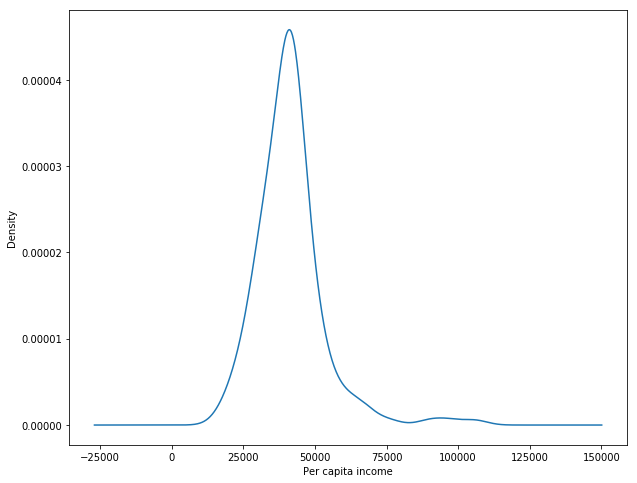

In [0]:
df_length['Per capita income'].plot.kde(figsize=(10,8))
plt.xlabel('Per capita income')

Text(0.5, 0, 'TotalLen')

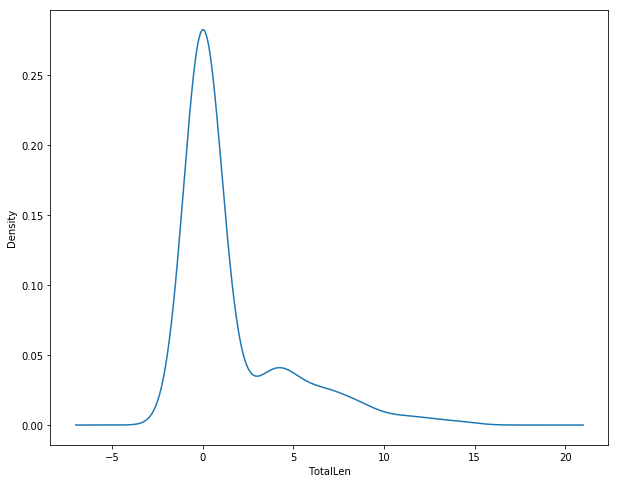

In [0]:
df_length['TotalLen'].plot.kde(figsize=(10,8))
plt.xlabel('TotalLen')

In [0]:
# !pip install scipy==1.2

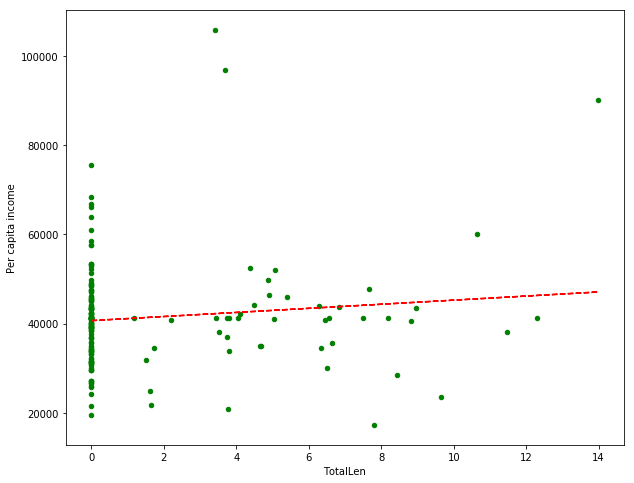

In [0]:
df_length.plot.scatter(x='TotalLen', y='Per capita income',c='Green',figsize=(10,8))
x= df_length['TotalLen']
y= df_length['Per capita income']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [0]:
!pip install scipy==1.2 ## Sometimes this will ask you to restart runtime. Just Run all again if you see that!

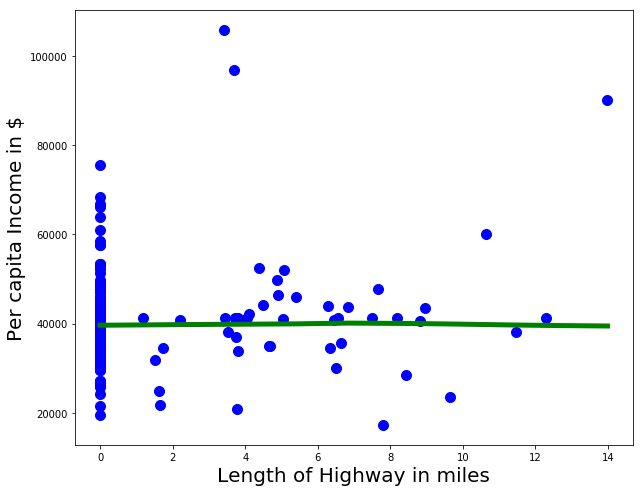

In [0]:

# https://math.dartmouth.edu/~m50f15/Lowess.html

X= df_length['TotalLen']
Y= df_length['Per capita income']
plt.figure(figsize=(10,8))
plt.plot(X,Y,'bo',ms=10) 
plt.xlabel('Length of Highway in miles',fontsize=20)
plt.ylabel('Per capita Income in $',fontsize=20)

# how to import lowess function 

import statsmodels.api as sm
lowess = sm.nonparametric.lowess
Z = lowess(Y,X,frac=10,it=10)

# farc = neighborhood size, it= number of iterations 
# See http://statsmodels.sourceforge.net/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html
# for further description 


plt.plot(Z[:,0],Z[:,1],'g-',lw=5);

There is no significant trend observed between length of highway and percapita income.

In [0]:
# Relationship between highway exits and income

df_exits=df_dt.groupby(['Town','County','Per capita income'])['NumExits15','NumExits91','NumExits95'].sum().reset_index()
df_exits['TotalExits']=df_exits[['NumExits15','NumExits91','NumExits95']].sum(axis=1)
df_exits=df_exits[['TotalExits','Per capita income']]
df_exits.sort_values('TotalExits',ascending=False).head(10)

,TotalExits,Per capita income
92,14.0,23527
14,10.0,21002
63,9.0,17311
56,9.0,90087
50,8.0,60155
83,8.0,40616
163,8.0,41386
102,7.0,43570
134,7.0,47819
143,6.0,46037


Text(0.5, 0, 'Per capita income')

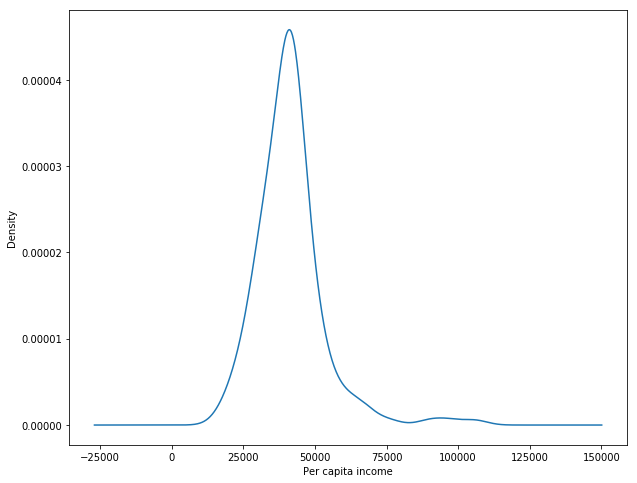

In [0]:
df_exits['Per capita income'].plot.kde(figsize=(10,8))
plt.xlabel('Per capita income')

Text(0.5, 0, 'TotalExits')

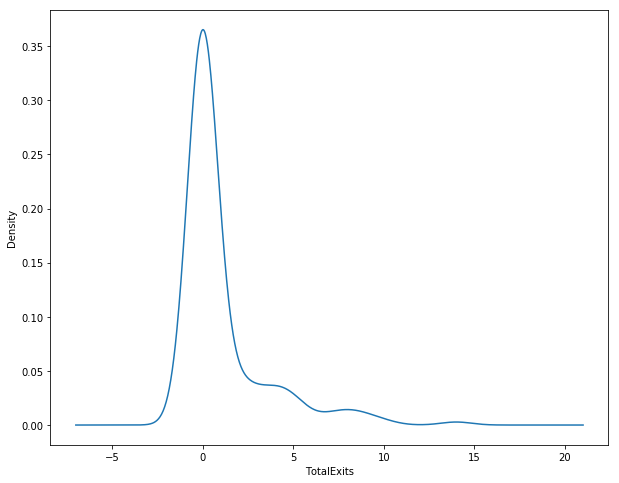

In [0]:
df_exits['TotalExits'].plot.kde(figsize=(10,8))
plt.xlabel('TotalExits')

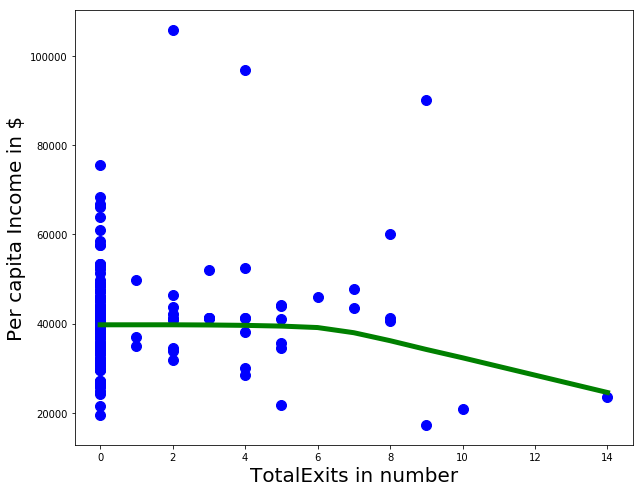

In [0]:

# https://math.dartmouth.edu/~m50f15/Lowess.html

Y= df_exits['Per capita income']
X= df_exits['TotalExits']
plt.figure(figsize=(10,8))
plt.plot(X,Y,'bo',ms=10) 
plt.xlabel('TotalExits in number',fontsize=20)
plt.ylabel('Per capita Income in $',fontsize=20)

# how to import lowess function 

import statsmodels.api as sm
lowess = sm.nonparametric.lowess
Z = lowess(Y,X,frac=1,it=10)

# farc = neighborhood size, it= number of iterations 
# See http://statsmodels.sourceforge.net/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html
# for further description 


plt.plot(Z[:,0],Z[:,1],'g-',lw=5);

Based on the trend line, it looks like as the number of exits increases, the per capita income of people is less in that town

In [0]:
# Is there a relation between population and Income?
df_pop_inc=df_dt[['Per capita income','Est. Pop.']]

Text(0.5, 0, 'Per capita income')

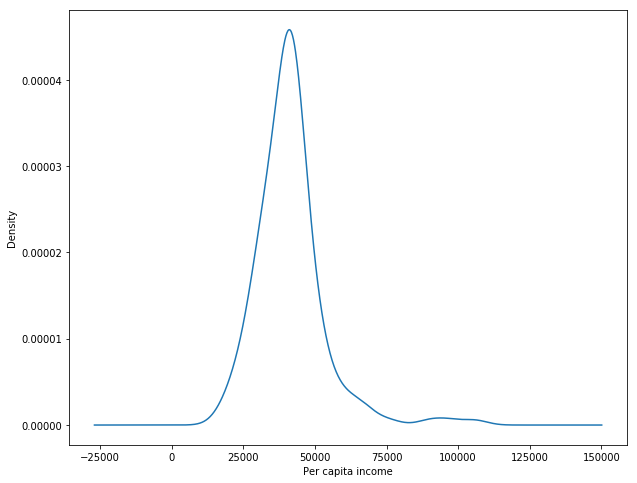

In [0]:
df_pop_inc['Per capita income'].plot.kde(figsize=(10,8))
plt.xlabel('Per capita income')

Text(0.5, 0, 'Estimated population')

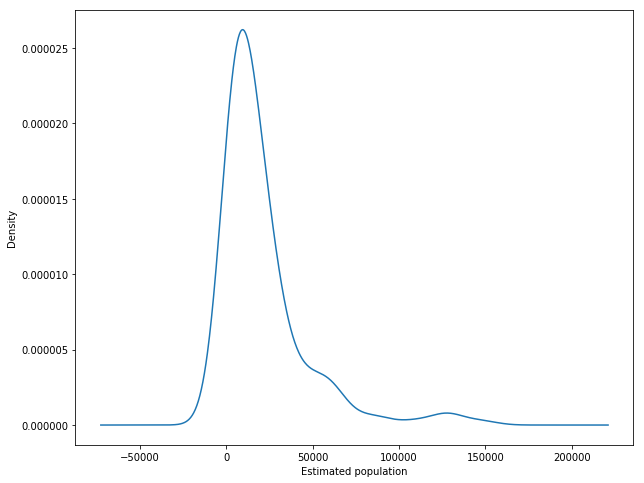

In [0]:
df_pop_inc['Est. Pop.'].plot.kde(figsize=(10,8))
plt.xlabel('Estimated population')

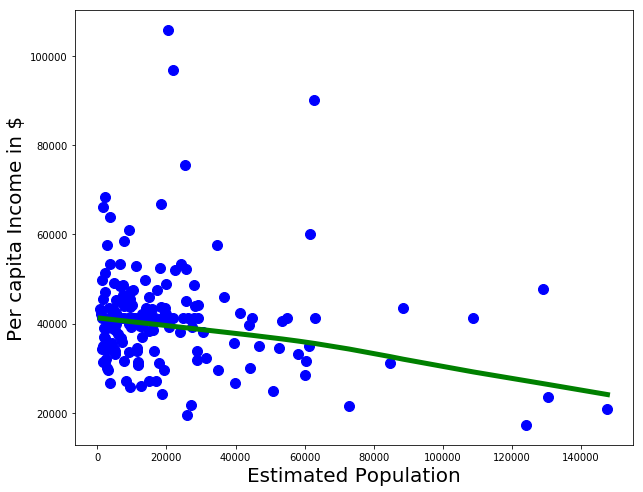

In [0]:

# https://math.dartmouth.edu/~m50f15/Lowess.html

Y= df_pop_inc['Per capita income']
X= df_pop_inc['Est. Pop.']
plt.figure(figsize=(10,8))
plt.plot(X,Y,'bo',ms=10) 
plt.xlabel('Estimated Population',fontsize=20)
plt.ylabel('Per capita Income in $',fontsize=20)

# how to import lowess function 

import statsmodels.api as sm
lowess = sm.nonparametric.lowess
Z = lowess(Y,X,frac=1,it=10)

# farc = neighborhood size, it= number of iterations 
# See http://statsmodels.sourceforge.net/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html
# for further description 


plt.plot(Z[:,0],Z[:,1],'g-',lw=5);

The trend line shows that as the estimated population increases, the percapita income is less in that town

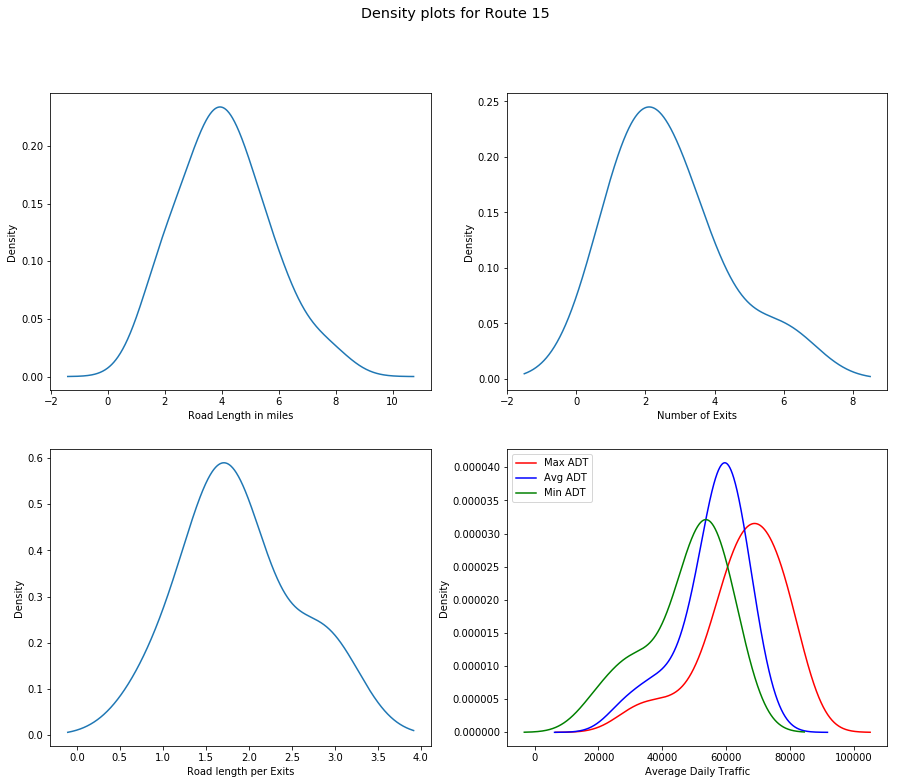

In [0]:
# Four Panel Plot for Route 15
# https://stackoverflow.com/questions/39987071/plotting-a-dataframe-as-both-a-hist-and-kde-on-the-same-plot

fig=plt.figure(figsize=(15,12))
plt.suptitle('Density plots for Route 15', fontsize="x-large")
ax1 = fig.add_subplot(2,2,1)
ax1 = df_dt.RoadLen15.plot(kind='kde')
# df_dt.RoadLen15.plot(kind='hist', ax=ax1)
ax1.set_xlabel('Road Length in miles')
ax2 = fig.add_subplot(2,2,2)
ax2 = df_dt.NumExits15.plot(kind='kde')
# df_dt.NumExits15.plot(kind='hist', ax=ax2)
ax2.set_xlabel('Number of Exits')
ax3 = fig.add_subplot(2,2,3)
ax3 = df_dt.RoadLenPerExits15.plot(kind='kde')
# df_dt.RoadLenPerExits15.plot(kind='hist', ax=ax3)
ax3.set_xlabel('Road length per Exits')
# ax3 = plt.xticks(rotation=45)
ax4 = fig.add_subplot(2,2,4)
ax4 = df_dt.MaxTraff15.plot(kind='kde', c='red', label='Max ADT')
ax4 = df_dt.MeanTraff15.plot(kind='kde', c='blue', label='Avg ADT')
ax4 = df_dt.MinTraff15.plot(kind='kde', c='green', label='Min ADT')
ax4.set_xlabel('Average Daily Traffic')
ax4 = plt.legend(loc='upper left')
# ax4 = plt.xticks(rotation=45)

In [0]:
df_sum15=df_dt[['RoadLen15','NumExits15','RoadLenPerExits15','MaxTraff15','MinTraff15','MeanTraff15']]
round(df_sum15.describe(),2)

,RoadLen15,NumExits15,RoadLenPerExits15,MaxTraff15,MinTraff15,MeanTraff15
count,21.00,9.00,9.00,21.00,21.00,21.00
mean,4.08,2.67,1.89,65080.95,47219.05,55381.00
std,1.56,1.58,0.65,12772.93,12785.60,10692.76
min,1.63,1.00,0.90,31200.00,18700.00,27609.00
25%,3.18,2.00,1.53,60500.00,44000.00,50843.00
50%,3.85,2.00,1.76,67500.00,52200.00,57560.00
75%,4.68,3.00,2.02,76000.00,55300.00,61729.00
max,7.70,6.00,2.91,80400.00,62500.00,70300.00


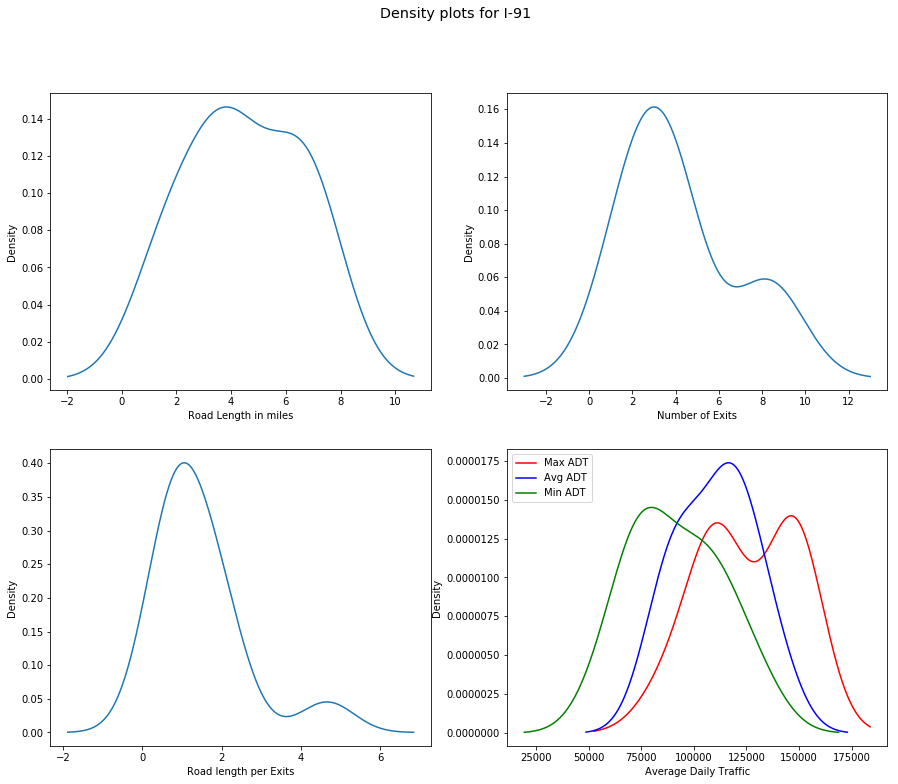

In [0]:
# Four panel plot for I-91
fig=plt.figure(figsize=(15,12))
plt.suptitle('Density plots for I-91', fontsize="x-large")
ax1 = fig.add_subplot(2,2,1)
ax1 = df_dt.RoadLen91.plot(kind='kde')
# df_dt.RoadLen91.plot(kind='hist', ax=ax1)
ax1.set_xlabel('Road Length in miles')
ax2 = fig.add_subplot(2,2,2)
ax2 = df_dt.NumExits91.plot(kind='kde')
# df_dt.NumExits91.plot(kind='hist', ax=ax2)
ax2.set_xlabel('Number of Exits')
ax3 = fig.add_subplot(2,2,3)
ax3 = df_dt.RoadLenPerExits91.plot(kind='kde')
# df_dt.RoadLenPerExits91.plot(kind='hist', ax=ax3)
ax3.set_xlabel('Road length per Exits')
# ax3 = plt.xticks(rotation=45)
ax4 = fig.add_subplot(2,2,4)
ax4 = df_dt.MaxTraff91.plot(kind='kde', c='red', label='Max ADT')
ax4 = df_dt.MeanTraff91.plot(kind='kde', c='blue', label='Avg ADT')
ax4 = df_dt.MinTraff91.plot(kind='kde', c='green', label='Min ADT')
ax4.set_xlabel('Average Daily Traffic')
ax4 = plt.legend(loc='upper left')
# ax4 = plt.xticks(rotation=45)

In [0]:
df_sum91=df_dt[['RoadLen91','NumExits91','RoadLenPerExits91','MaxTraff91','MinTraff91','MeanTraff91']]
round(df_sum91.describe(),2)

,RoadLen91,NumExits91,RoadLenPerExits91,MaxTraff91,MinTraff91,MeanTraff91
count,13.00,13.00,13.00,13.00,13.00,13.00
mean,4.48,4.15,1.44,125684.62,91538.46,110232.62
std,2.09,2.58,1.13,22506.47,22265.88,18564.81
min,1.19,1.00,0.30,85400.00,56800.00,79829.00
25%,3.39,2.00,0.86,110500.00,76000.00,94889.00
50%,4.11,4.00,1.10,115800.00,91800.00,112800.00
75%,6.51,4.00,1.76,147400.00,106600.00,119900.00
max,7.51,9.00,4.66,151000.00,131500.00,141920.00


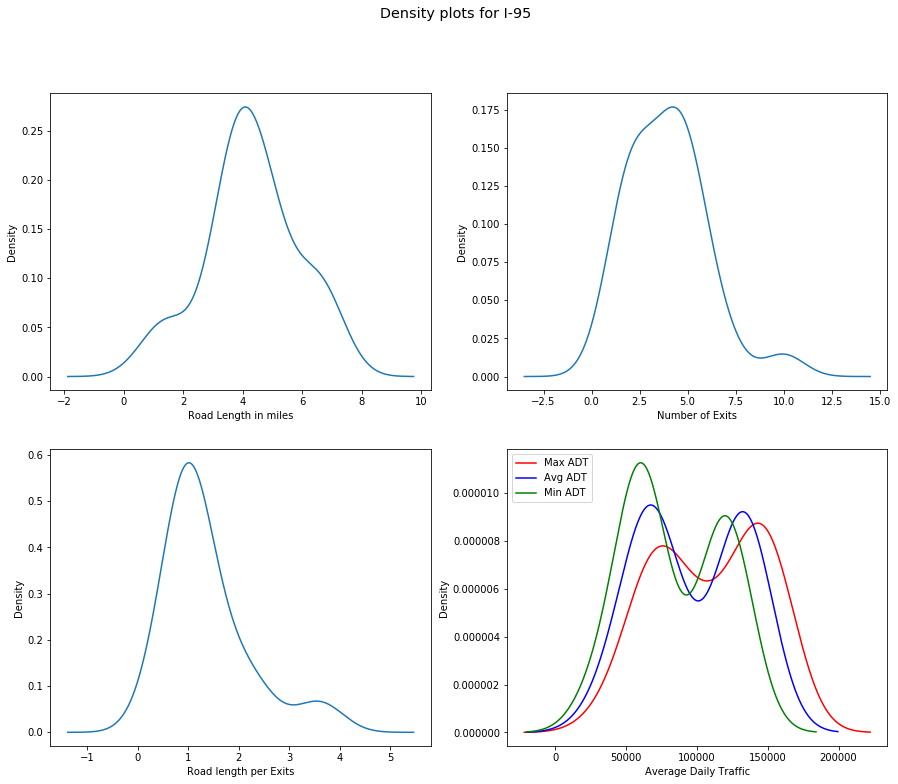

In [0]:
# Four panel plot for I-95
fig=plt.figure(figsize=(15,12))
plt.suptitle('Density plots for I-95', fontsize="x-large")
ax1 = fig.add_subplot(2,2,1)
ax1 = df_dt.RoadLen95.plot(kind='kde')
# df_dt.RoadLen95.plot(kind='hist', ax=ax1)
ax1.set_xlabel('Road Length in miles')
ax2 = fig.add_subplot(2,2,2)
ax2 = df_dt.NumExits95.plot(kind='kde')
# df_dt.NumExits95.plot(kind='hist', ax=ax2)
ax2.set_xlabel('Number of Exits')
ax3 = fig.add_subplot(2,2,3)
ax3 = df_dt.RoadLenPerExits95.plot(kind='kde')
# df_dt.RoadLenPerExits95.plot(kind='hist', ax=ax3)
ax3.set_xlabel('Road length per Exits')
# ax3 = plt.xticks(rotation=45)
ax4 = fig.add_subplot(2,2,4)
ax4 = df_dt.MaxTraff95.plot(kind='kde', c='red', label='Max ADT')
ax4 = df_dt.MeanTraff95.plot(kind='kde', c='blue', label='Avg ADT')
ax4 = df_dt.MinTraff95.plot(kind='kde', c='green', label='Min ADT')
ax4.set_xlabel('Average Daily Traffic')
ax4 = plt.legend(loc='upper left')
# ax4 = plt.xticks(rotation=45)

In [0]:
df_sum95=df_dt[['RoadLen95','NumExits95','RoadLenPerExits95','MaxTraff95','MinTraff95','MeanTraff95']]
round(df_sum95.describe(),2)

,RoadLen95,NumExits95,RoadLenPerExits95,MaxTraff95,MinTraff95,MeanTraff95
count,26.00,26.00,26.00,26.00,26.00,26.00
mean,4.29,3.92,1.36,109238.46,84146.15,96644.88
std,1.52,2.04,0.84,37772.95,33275.71,35995.37
min,1.02,1.00,0.33,39200.00,30800.00,34740.00
25%,3.70,2.00,0.87,72050.00,58250.00,66253.50
50%,4.20,4.00,1.10,110000.00,68850.00,84060.00
75%,5.01,5.00,1.60,146500.00,119200.00,132506.75
max,6.84,10.00,3.75,161300.00,133000.00,144610.00


# Comments on placements of tolls

We can see that on an average, around 100K vehicles are using the highways I-91 and I-95 daily and around 50K vehicles are using Merritt Parkway.


> If we relate average daily traffic with tolls, we might want to know the estimates of how much the dept of transportation in connecticut is spending on the maintainance, what are the estimates of their annual funds. We might also want to take into consideration natural hazards effect on roads and their expenditure if the effects were frequent. If there is a lot of over budget expenditure, we might initially consider charging toll fee for cars using the highway for the longest distances - mainly the I-91 as the data shows that the average daily traffic is highest on 91 when compared to 95 and Merritt Parkway.

